In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\TCS.NS.csv",index_col='Date', parse_dates=['Date'])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-27,1832.300049,1875.000000,1825.000000,1836.599976,1815.905884,3374741.0
2020-04-28,1865.000000,1868.000000,1832.599976,1859.050049,1838.102905,2678505.0
2020-04-29,1874.000000,1912.550049,1850.050049,1905.650024,1884.177979,4241510.0
2020-04-30,1980.000000,2032.000000,1942.199951,2014.449951,1991.751831,5915544.0
2020-05-04,1966.000000,1966.000000,1913.650024,1930.449951,1908.698364,3729348.0
...,...,...,...,...,...,...
2021-04-20,3225.000000,3225.350098,3126.350098,3144.550049,3144.550049,3141893.0
2021-04-22,3148.000000,3148.000000,3105.250000,3118.800049,3118.800049,1988980.0
2021-04-23,3105.000000,3119.000000,3091.050049,3109.500000,3109.500000,1615309.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-04-27 to 2021-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [4]:
df=df.dropna()

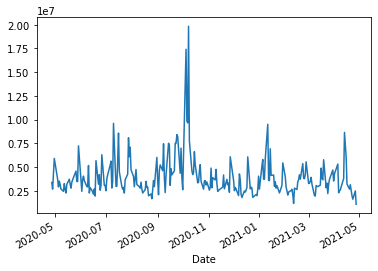

In [5]:
df["Volume"].plot()

In [6]:
x=df["Volume"]

In [7]:
len(x)

250

In [8]:
train_len=int(0.8*len(x))

In [9]:
train=x[:train_len]
len(train)

200

In [10]:
train.head(100)

Date
2020-04-27    3374741.0
2020-04-28    2678505.0
2020-04-29    4241510.0
2020-04-30    5915544.0
2020-05-04    3729348.0
                ...    
2020-09-09    3866535.0
2020-09-10    2308813.0
2020-09-11    4145424.0
2020-09-14    7512131.0
2020-09-15    7318770.0
Name: Volume, Length: 100, dtype: float64

In [11]:
test=x[train_len:]
len(test)

50

In [12]:
test.head(100)

Date
2021-02-10    2127983.0
2021-02-11    1165882.0
2021-02-12    2777404.0
2021-02-15    2630853.0
2021-02-16    3435770.0
2021-02-17    3678426.0
2021-02-18    4189909.0
2021-02-19    3725028.0
2021-02-22    5366696.0
2021-02-23    3832829.0
2021-02-24    3774549.0
2021-02-25    4224073.0
2021-02-26    5553153.0
2021-03-01    3265871.0
2021-03-02    3306469.0
2021-03-03    3509857.0
2021-03-04    3916760.0
2021-03-05    3203686.0
2021-03-08    2003125.0
2021-03-09    1942397.0
2021-03-10    3053778.0
2021-03-12    2938317.0
2021-03-15    3097083.0
2021-03-16    4894756.0
2021-03-17    3838390.0
2021-03-18    3656306.0
2021-03-19    5776626.0
2021-03-22    2821646.0
2021-03-23    3305973.0
2021-03-24    2207104.0
2021-03-25    3179786.0
2021-03-26    3697370.0
2021-03-30    4694008.0
2021-03-31    3530069.0
2021-04-01    4285076.0
2021-04-05    5317862.0
2021-04-06    2291562.0
2021-04-07    2491268.0
2021-04-08    2578118.0
2021-04-09    2911129.0
2021-04-12    3791828.0
2021-04-13 

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(3,1,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Volume   No. Observations:                  199
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3160.688
Method:                       css-mle   S.D. of innovations        1893392.432
Date:                Sat, 01 May 2021   AIC                           6335.377
Time:                        22:34:43   BIC                           6358.430
Sample:                             1   HQIC                          6344.707
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -552.5517   5951.900     -0.093      0.926   -1.22e+04    1.11e+04
ar.L1.D.Volume    -0.0644      0.150     -0.431      0.667      -0.357       0.229
ar.L2.D.Volume     0.1647      0.091      1.804      0.071      -0.014       0.344
ar.L3.D.Volume     0.3450      0.067      5.136      0.000       0.213       0.477
ma.L1.D.Volume    -0.5194      0.155     -3.347      0.001      -0.824      -0.215
ma.L2.D.Volume    -0.4806      0.154     -3.121      0.002      -0.782      -0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3221           -0.0000j            1.3221           -0.0000
AR.2           -0.8998           -1.1760j            1.4807           -0.3539
AR.3           -0.8998           +1.1760j            1.4807            0.3539
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.0809           +0.0000j            2.0809            0.5000
-----------------------------------------------------------------------------
"""

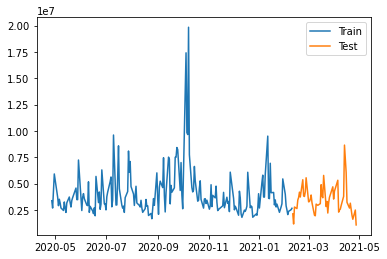

In [14]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [15]:
ypred_train=model_fit.predict()

In [16]:
ypred_train

Date
2020-04-28   -5.525517e+02
2020-04-29    2.486691e+05
2020-04-30   -5.032418e+05
2020-05-04   -1.486838e+06
2020-05-05    3.224433e+05
                  ...     
2021-02-03    1.293003e+06
2021-02-04    5.843032e+05
2021-02-05    9.152643e+05
2021-02-08    5.821402e+05
2021-02-09    3.924269e+05
Length: 199, dtype: float64

In [17]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [18]:
ypred_test,test

(199    462009.204813
 200    172151.509824
 201    110302.197832
 202    180334.147985
 203     65642.996997
 204     63223.310728
 205     68648.296783
 206     28333.970445
 207     30987.713537
 208     26048.301984
 209     12895.548266
 210     13844.097979
 211      9912.649490
 212      5784.456773
 213      5729.870027
 214      3697.147686
 215      2394.839481
 216      2125.027478
 217      1226.636764
 218       790.748726
 219       577.752267
 220       209.737563
 221        47.969218
 222       -75.713693
 223      -221.356260
 224      -288.160670
 225      -350.517828
 226      -407.751626
 227      -437.384817
 228      -466.416511
 229      -489.173381
 230      -502.713316
 231      -515.605500
 232      -524.856554
 233      -531.055597
 234      -536.627903
 235      -540.481726
 236      -543.290040
 237      -545.666389
 238      -547.305489
 239      -548.560212
 240      -549.569224
 241      -550.276403
 242      -550.829935
 243      -551.258877
 244      

In [19]:
date_test=pd.date_range(start='2021-02-10',end="2021-03-31")
date_test

DatetimeIndex(['2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [20]:
ypred_test.index=date_test

In [21]:
ypred_test

2021-02-10    462009.204813
2021-02-11    172151.509824
2021-02-12    110302.197832
2021-02-13    180334.147985
2021-02-14     65642.996997
2021-02-15     63223.310728
2021-02-16     68648.296783
2021-02-17     28333.970445
2021-02-18     30987.713537
2021-02-19     26048.301984
2021-02-20     12895.548266
2021-02-21     13844.097979
2021-02-22      9912.649490
2021-02-23      5784.456773
2021-02-24      5729.870027
2021-02-25      3697.147686
2021-02-26      2394.839481
2021-02-27      2125.027478
2021-02-28      1226.636764
2021-03-01       790.748726
2021-03-02       577.752267
2021-03-03       209.737563
2021-03-04        47.969218
2021-03-05       -75.713693
2021-03-06      -221.356260
2021-03-07      -288.160670
2021-03-08      -350.517828
2021-03-09      -407.751626
2021-03-10      -437.384817
2021-03-11      -466.416511
2021-03-12      -489.173381
2021-03-13      -502.713316
2021-03-14      -515.605500
2021-03-15      -524.856554
2021-03-16      -531.055597
2021-03-17      -536

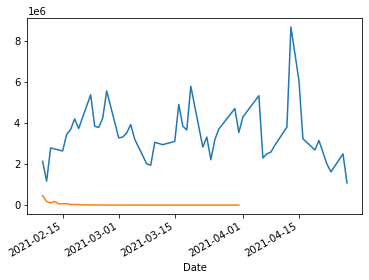

In [22]:
test.plot()
ypred_test.plot()

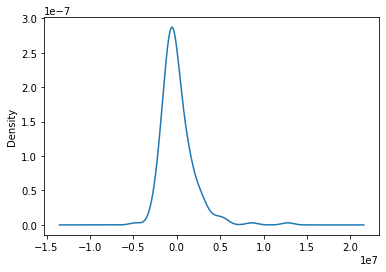

In [23]:
residuals=model_fit.resid
residuals.plot(kind="kde")

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 13608627331980.115
RMSE is : 3688987.3043940007


In [25]:
#predict 30 future values

In [26]:
model=ARIMA(x,order=(2,0,1))
model_fit=model.fit()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [27]:
x

Date
2020-04-27    3374741.0
2020-04-28    2678505.0
2020-04-29    4241510.0
2020-04-30    5915544.0
2020-05-04    3729348.0
                ...    
2021-04-20    3141893.0
2021-04-22    1988980.0
2021-04-23    1615309.0
2021-04-26    2490260.0
2021-04-27    1078655.0
Name: Volume, Length: 250, dtype: float64

In [28]:
forecast=model_fit.predict(start=len(x),end=len(x)+29)

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [29]:
forecast

250    2.553960e+06
251    2.906765e+06
252    3.049632e+06
253    3.146588e+06
254    3.227825e+06
255    3.299527e+06
256    3.363507e+06
257    3.420722e+06
258    3.471910e+06
259    3.517710e+06
260    3.558689e+06
261    3.595356e+06
262    3.628164e+06
263    3.657519e+06
264    3.683785e+06
265    3.707286e+06
266    3.728314e+06
267    3.747129e+06
268    3.763964e+06
269    3.779028e+06
270    3.792505e+06
271    3.804565e+06
272    3.815355e+06
273    3.825010e+06
274    3.833649e+06
275    3.841378e+06
276    3.848294e+06
277    3.854482e+06
278    3.860019e+06
279    3.864973e+06
dtype: float64

In [30]:
forecast_date=pd.date_range(start="2019-01-01",end="2019-01-30")
len(forecast_date),len(forecast)

(30, 30)

In [31]:
forecast.index=forecast_date

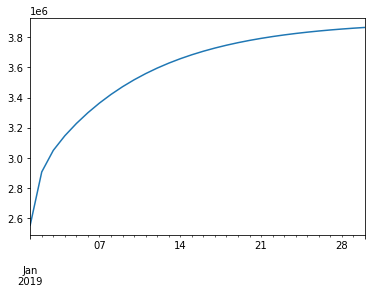

In [32]:
forecast.plot()